# Saketh Mattupalli
<h1> CSE</h1>

# Topic Modelling Assignment

In [26]:
import spacy
import numpy as np
from PIL import Image
from os import path, getcwd
import pandas as pd
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
import re
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import warnings
warnings.filterwarnings("ignore")

# Task 1:  Loading the dataset

In [27]:
startup_data = pd.read_excel("Startup data.xlsx")
startup_data.head()

,Startup News,Summary,Posted By,Description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu..."


# TASK 2: - Data Cleaning and Wrangling

In [28]:
startup_data['Content'] = startup_data['Startup News'].map(str)+" "+ startup_data['Summary'].map(str)+" "+ startup_data['Description'].map(str)
Content = startup_data['Content'].tolist()

In [29]:
startup_data.head()

,Startup News,Summary,Posted By,Description,Content
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...


In [26]:
#type(Content[0])
#Content

In [30]:
def clean(x):
    return re.sub('[^\x00-\x7f]','',x)
for i in range(len(Content)):
     Content[i] = clean(Content[i])

In [7]:
#Content

# TASK 3: - Natural Language Processing

In [31]:
for i in range(len(Content)):
    j = nlp(Content[i])
    #removing stopwords , punctiation and storing lematised words in Content list
    f_story = [k.lemma_.lower() for k in j if ( k.is_stop == False) and (k.is_punct == False) and (len(k.text)>3)]
    Content[i] = nlp(" ".join(f_story))
startup_data['Content'] = Content

In [32]:
startup_data.head()

,Startup News,Summary,Posted By,Description,Content
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...","(pubg, redefine, indian, gaming, ecosystem, fo..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,"(dream11, close, funding, tencent, inch, unico..."
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,"(enterprise, gaming, grow, ridicule, opportuni..."
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...","(grad, change, india, look, poker, madoverpoke..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...","(facebook, celebrate, year, encourage, woman, ..."


In [30]:
#Content

# TASK 4: - Text Visualization

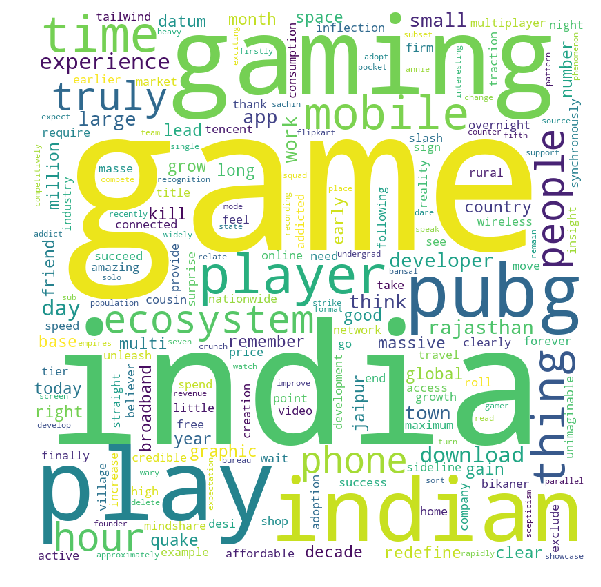

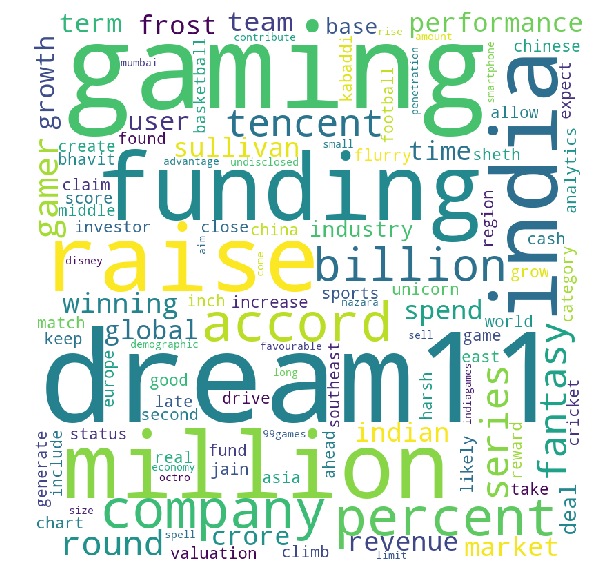

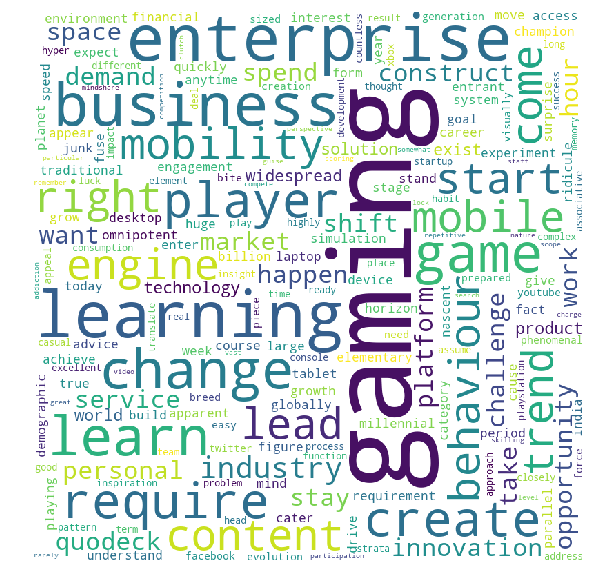

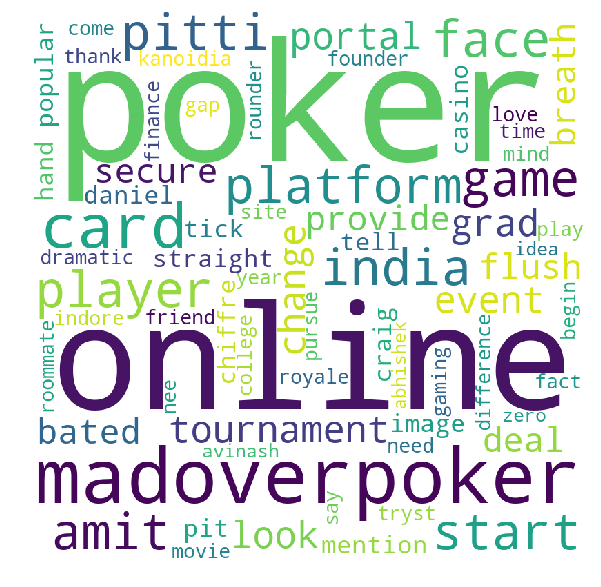

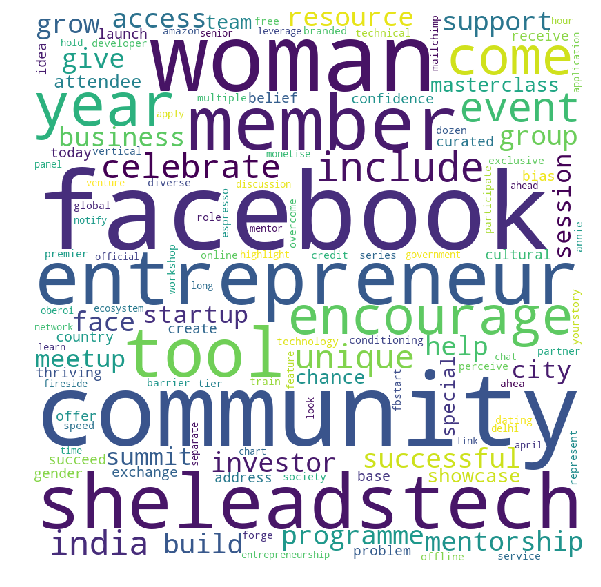

In [33]:
for i in range(5):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(Content[i].text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

# TASK 5: - Topic Modelling

In [34]:
def topic_modeller(texting):
    doc = nlp(texting)
    article = []
    for w in doc:
        if w.is_stop!=True and not w.is_punct and not w.like_num:
            article.append(w.lemma_)
    bigram = gensim.models.Phrases(article)
    texts = [bigram[line] for line in article]
    article = [d.split() for d in article]
    dictionary = Dictionary(article)
    corpus = [dictionary.doc2bow(text) for text in article]
    ldamodel = LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,random_state=42)
    ab = ldamodel.show_topics(num_topics=1)
    b = re.sub("[^a-zA-Z]{4,}"," ",str(ab))
    b = b.split()
    unique_list = []
    for x in b: 
        if x not in unique_list:
            unique_list.append(x)
    line = [i for i in unique_list if len(i) > 1]
    return line

In [13]:
#Content

In [35]:
str(Content[0])
for i in range(len(Content)):
    Content[i] = str(Content[i])
#Content[0]

In [36]:
result = []
for j in Content:
    result.append(topic_modeller(j))
startup_data['Tags'] = result
startup_data['Tags'] = startup_data['Tags'].str.join(', ')

export = startup_data[['Startup News','Summary','Posted By','Description','Content','Tags']]

In [37]:
export.head()

,Startup News,Summary,Posted By,Description,Content,Tags
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...","(pubg, redefine, indian, gaming, ecosystem, fo...","pubg, phone, game, people, friend, gaming, thi..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,"(dream11, close, funding, tencent, inch, unico...","dream, fund, user, accord, deal, game, include..."
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,"(enterprise, gaming, grow, ridicule, opportuni...","gaming, technology, behaviour, demand, busines..."
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...","(grad, change, india, look, poker, madoverpoke...","card, mention, friend, breath, mind, flush, av..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...","(facebook, celebrate, year, encourage, woman, ...","woman, community, access, sheleadstech, invest..."


In [38]:
#len(export.Tags[0].split(','))
export.Tags[0]

'pubg, phone, game, people, friend, gaming, thing, month, work, pattern'

In [39]:
'gaming' in export.Tags[0]

True

# TASK 6: - Categorizing each news article

In [40]:
startup_data.head()

,Startup News,Summary,Posted By,Description,Content,Tags
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...","(pubg, redefine, indian, gaming, ecosystem, fo...","pubg, phone, game, people, friend, gaming, thi..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,"(dream11, close, funding, tencent, inch, unico...","dream, fund, user, accord, deal, game, include..."
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,"(enterprise, gaming, grow, ridicule, opportuni...","gaming, technology, behaviour, demand, busines..."
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...","(grad, change, india, look, poker, madoverpoke...","card, mention, friend, breath, mind, flush, av..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...","(facebook, celebrate, year, encourage, woman, ...","woman, community, access, sheleadstech, invest..."


In [70]:
#Content[]

In [41]:
#Categorizing news articles
category = []
for i in range(len(Content)):
    if('game' in Content[i] or 'gaming' in Content[i]):
        category.append('Game')
    elif('woman' in Content[i]):
        category.append('Women')
    elif('fund' in Content[i] or 'funding' in Content[i]):
        category.append('Fund')
    elif('founder' in Content[i] or 'startup' in Content[i] or 'urbanclap' in Content[i]):
        category.append('Startup')
    elif('science' in Content[i]):
        category.append('Science')
    else:
        category.append('NA')
startup_data['Category'] = category

In [42]:
startup_data.head()

,Startup News,Summary,Posted By,Description,Content,Tags,Category
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...","(pubg, redefine, indian, gaming, ecosystem, fo...","pubg, phone, game, people, friend, gaming, thi...",Game
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,"(dream11, close, funding, tencent, inch, unico...","dream, fund, user, accord, deal, game, include...",Game
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,"(enterprise, gaming, grow, ridicule, opportuni...","gaming, technology, behaviour, demand, busines...",Game
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...","(grad, change, india, look, poker, madoverpoke...","card, mention, friend, breath, mind, flush, av...",Game
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...","(facebook, celebrate, year, encourage, woman, ...","woman, community, access, sheleadstech, invest...",Women


# TASK 7: - Finding more insights of data

In [43]:
startup_data['Content'] = startup_data['Startup News'] + startup_data['Summary'] + startup_data['Description']

In [44]:
def ner_tagger(text):
    doc = nlp(text)
    name = []
    organization = []
    location = []
    for i in doc.ents:
        if i.label_=='PERSON':
            if i.lemma_ not in name:
                name.append(i.lemma_)                
        if i.label_=='ORG' and len(i.lemma_) > 2:
            if i.lemma_ not in organization:
                organization.append(i.lemma_)
        if i.label_=='GPE' and len(i.lemma_) > 2:
            if i.lemma_ not in location:
                location.append(i.lemma_)
    return name,organization,location

In [45]:
type(Content[0])

str

In [46]:
person = []
org = []
loc = []
for i in startup_data['Content'].values.tolist():
    a,b,c = ner_tagger(str(i))
    person.append(a)
    org.append(b)
    loc.append(c)

In [47]:
startup_data['Person Name'] = person
startup_data['Organization'] = org
startup_data['Geograpahical Location'] = loc

In [48]:
startup_data

,Startup News,Summary,Posted By,Description,Content,Tags,Category,Person Name,Organization,Geograpahical Location
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...,"pubg, phone, game, people, friend, gaming, thi...",Game,"[Jio, Flipkart Co - founder, Sachin Bansal]","[PUBG, Tencent, ET Bureau, App Annie]., Age of...","[Rajasthan, Jaipur, Bikaner, India]"
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,NaN,"dream, fund, user, accord, deal, game, include...",Game,[],[],[]
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,NaN,"gaming, technology, behaviour, demand, busines...",Game,[],[],[]
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...,"card, mention, friend, breath, mind, flush, av...",Game,"[Daniel Craig, Amit Kanoidia, Rounder, Amit, A...","[Le Chiffre, MadOverPoker, Indore]","[India, Finance]"
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...",NaN,"woman, community, access, sheleadstech, invest...",Women,[],[],[]
5,Confidence: women's last hurdle to making it t...,Women working at their full potential could ad...,Apurva Purohit,Women possess most of the characteristics of a...,Confidence: women's last hurdle to making it t...,"example, power, confidence, india, company, at...",Women,[],"[the World Economic Forum, Fortune, NSE, World...","[America, India]"
6,From the beauty of handlooms to Captain Marvel...,NaN,Team YS,"Seema Agarwal, Co-founder of Artisan Saga, tal...",NaN,"seema, captain, believe, long, finance, fabric...",Women,[],[],[]
7,"Hansi Mehrotra, Founder of The Money Hans, on ...",NaN,Shruthi Mohan,"“My father, who was on his deathbed, told me t...",NaN,"second, basic, career, girl, begin, drawer, ne...",Women,[],[],[]
8,India's missing demographic dividend: an analy...,NaN,Team YS,"All through this month, in the wake of Interna...",NaN,"participation, india, small, language, change,...",Women,[],[],[]
9,These 5 STEM-based activity startups are on a ...,Meet the five startups that are using digital ...,Libza Mannan,"The demand for Science, Technology, Engineerin...",These 5 STEM-based activity startups are on a ...,"stem, learn, robotic, toy, market, online, ent...",Startup,"[Smartivity Labs, Tushar A Amin, Apoorv Gupta,...","[STEM, Science , Technology , Engineering, Mat...","[India, Delhi, Tarun, Swati Gupta, Pankaj, Tac..."
